# Projeto 01 - Parte C: Construção e avaliação de Modelos de Machine Learning no Python


## Objetivos da Parte C do projeto 01:

- demonstrar como realizar a construção, predição, avaliação e tomadas de decisão de Modelos de Machine Learning gerados a partir de um banco de dados de veículos usados.

## Detalhamento do Dataset estudado

- OBSERVAÇÃO: Esse projeto é uma continuação direta do "Projeto_01_Parte_B_Exploracao_de_dados_no_Python" que consta no meu repositório do Github (https://github.com/Campos-Silva/Projeto_01_Parte_B_Exploracao_de_dados_no_Python).

- Portanto, irei lidar com os dados já previamente formatados oriundo da parte anterior do projeto 01.

- O Dataset usado para esse parte C encontra-se na pasta raiz do repósitorio (https://github.com/Campos-Silva/Projeto_01_Parte_C_Modelos_de_Machine_Learning_no_Python/blob/main/carros_formatado_pos_analises_exploratorias.csv).

- Conforme mencionado previamente, esse dataset possui dados de carros usados, o qual nos permite fazer diversas análises em Data Science, inclusive criar modelos preditivos de machine learning, através de regressão linear.

##Conteúdo da parte C:

- Modelo Linear Simples;

- Predição e tomada de decisão;

- Avaliação, Treino e teste do Modelo de Machine Learning;

- Regressão Linear Múltipla;

- Overfitting, Underfitting e Seleção do Modelo;

- Ridge Regression;

- Grid Search





# Importação do dataset

In [183]:
#Vou trabalhar com a biblioteca pandas para importar e explorar inicialmente o Dataset

#Importando a biblioteca Pandas

import pandas as pd

In [184]:
#Importando a biblioteca Numpy

import numpy as np

In [185]:
#Agora vou importar o meu conjunto de dados através dessa biblioteca

carros = pd.read_csv("carros_formatado_pos_analises_exploratorias.csv")

In [186]:
#Vou identificar quantas linhas e colunas existem nesse conjunto de dados

carros.shape

(5282, 17)

In [187]:
#Quero visualizar as 5 primeiras linhas para identificar quais são as variáveis que existem nesse dataset.

carros.head(5)

,nome_completo_do_carro,ano,preco_de_venda_USD,km_rodado,tipo_combustivel,tipo_do_vendedor,transmissao,dono,consumo_do_combustivel_kmpl,motor_CC,potencia_do_motor_bhp,assentos,preco_de_venda_USD_normalizado,consumo_do_combustivel_kmpl_normalizado,preco_de_venda_USD_binned,tipo_de_combustivel_Diesel,tipo_de_combustivel_Petrol
0,Maruti Swift Dzire VDI,2014,6164.383562,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,-0.249661,1.001961,Baixo,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,5068.493151,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,-0.347573,0.437212,Baixo,1,0
2,Honda City 2017-2020 EXi,2006,2164.383562,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,-0.607043,-0.422406,Baixo,0,1
3,Hyundai i20 Sportz Diesel,2010,3082.191781,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,-0.525040,0.902006,Baixo,1,0
4,Maruti Swift VXI BSIII,2007,1780.821918,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,-0.641312,-0.822228,Baixo,0,1


#Modelo Linear Simples

In [188]:
#Importando o modelo linear de scikit-learn

from sklearn.linear_model import LinearRegression

In [189]:
#Criando um objeto de regressão linear usando a construção

lm=LinearRegression()

In [190]:
#Ajustando um modeleo linear simples

# Definindo a variável preditora e a variável alvo

x = carros[["km_rodado"]]

y = carros[["preco_de_venda_USD"]]

In [191]:
#Usando "lm.fit(X,Y) para ajustar o modelo"

lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
#Obtendo a predição

yhat=lm.predict(x)

Gráfico da regressão linear

(0.0, 18678.08219178082)

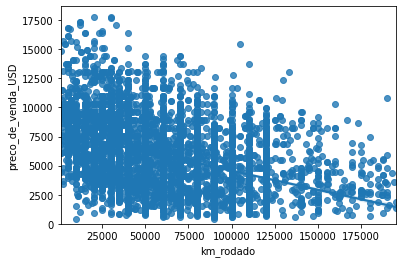

In [228]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.regplot(x="km_rodado", y = "preco_de_venda_USD", data = carros)

plt.ylim(0,)

Residual plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


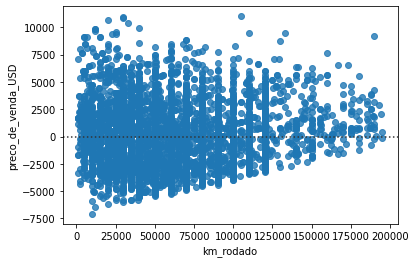

In [194]:
sns.residplot(carros["km_rodado"], carros["preco_de_venda_USD"])

Plot de distribuição

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


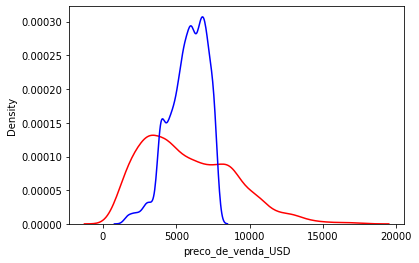

In [195]:
ax1 = sns.distplot(carros["preco_de_venda_USD"], hist=False, color="r", label="Actual Value")

sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

Medidas para avaliação do modelo


MSE

In [196]:
from sklearn.metrics import mean_squared_error

mean_squared_error(carros["preco_de_venda_USD"], yhat)

8034655.603263213

R^2

In [197]:
x = carros[["km_rodado"]]

y = carros[["preco_de_venda_USD"]]

lre=LinearRegression()

lre.fit(x,y)

lre.score(x,y)

0.16683218444695536

# Conclusão Prévia:

- Esse modelo tem um r^2 muito baixo. E provavelmente não é o melhor modelo. Assim, irei continuar com mais avaliações do mmodelo.

#Predição e tomada de decisção

In [199]:
#Primeiro temos de treinar o modelo

x = carros[["km_rodado"]]

y = carros[["preco_de_venda_USD"]]

lre.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
#Vou agora predizer o preço de um carro com 7000 km rodado

lre.predict([[7000]])

array([[7604.53656321]])

Resultado:

- 7604.53 dólares

Fazendo valores que façam sentido


In [201]:
#Importando numpy

import numpy as np

In [202]:
# Fazendo uma sequencia de 1-100000 (1 a Cem mil Km)

new_input=np.arange(1,100001,1000).reshape(-1,1)

In [203]:
yhat=lre.predict(new_input)

yhat

array([[7833.20684279],
       [7800.53499259],
       [7767.86314238],
       [7735.19129218],
       [7702.51944197],
       [7669.84759177],
       [7637.17574157],
       [7604.50389136],
       [7571.83204116],
       [7539.16019096],
       [7506.48834075],
       [7473.81649055],
       [7441.14464034],
       [7408.47279014],
       [7375.80093994],
       [7343.12908973],
       [7310.45723953],
       [7277.78538932],
       [7245.11353912],
       [7212.44168892],
       [7179.76983871],
       [7147.09798851],
       [7114.42613831],
       [7081.7542881 ],
       [7049.0824379 ],
       [7016.41058769],
       [6983.73873749],
       [6951.06688729],
       [6918.39503708],
       [6885.72318688],
       [6853.05133667],
       [6820.37948647],
       [6787.70763627],
       [6755.03578606],
       [6722.36393586],
       [6689.69208566],
       [6657.02023545],
       [6624.34838525],
       [6591.67653504],
       [6559.00468484],
       [6526.33283464],
       [6493.660

#Avaliação do modelo

In [204]:
# Dividindo os dados em amostras aleatorias de testes e subconjuntos

from sklearn.model_selection import train_test_split

y_train,x_train,x_test,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [205]:
#Function cross_val_score

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lre,x,y,cv=3)

np.mean(scores)

0.16198359533455242

In [206]:
#Function cross_val_predict()

from sklearn.model_selection import cross_val_predict

yhat=cross_val_predict(lre,x,y,cv=3)

yhat

array([[3206.03104851],
       [4029.35727882],
       [3383.61121583],
       ...,
       [3771.07864511],
       [7042.2582728 ],
       [7042.2582728 ]])

<h2 id="ref1">Parte 1: Treino e teste</h2>

<p>Um importante passo para testar esse meu modelo é dividir os meus dados em dados de treino e dados de teste. Vou colocar essa variável alvo  "<b>preco_de_venda_USD</b>" em um dataframe separado denominado de "<b>y_data</b>":</p>"

In [207]:
y_data = carros[["preco_de_venda_USD"]]

Agora irei remover essa variável alvo do dataframe "**x_data**":

In [208]:
x_data=carros.drop('preco_de_venda_USD',axis=1)

Agora, no próximo passo irei dividir os dados aleatoriamente em "dados de treino" e "dados de teste". Para isso irei usar a função "<b>train_test_split</b>".

In [209]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("Números de amostra de teste:", x_test.shape[0])
print("Números de amostras de treino:",x_train.shape[0])


Números de amostra de teste: 529
Números de amostras de treino: 4753


O parâmetro "<b>test_size</b>" ajusta a proporção do conjuto de dados que é dividido para o conjunto de teste. Acima eu ajustei o conjunto de teste para 10% do total do dataset.

Para o próximo passo irei importar a Regressão Linear através de "<b>LinearRegression</b>" a partir do módulo "<b>linear_model</b>".

In [210]:
from sklearn.linear_model import LinearRegression

Irei criar um objeto da Regressão Linear:

Agora irei ajustar o modelo usarndo a variável "km_rodado":

In [211]:
lre.fit(x_train[['km_rodado']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Vou calcular o R^2 do conjunto para o "test data":


In [212]:
lre.score(x_test[['km_rodado']], y_test)

0.17735510743146

Agora irei calcular o R^2 para as amostras de treino:

In [213]:
lre.score(x_train[['km_rodado']], y_train)

0.16571536876169735

Alguma vezes posso não ter uma amostra suficiente para os dados de teste. E assim, quando não temos dados suficentes, podemos utilizar a técnica de "cross-validation". Aqui há de certa forma uma quantidade suficiente para fazer uma amostra de teste. Porém, como a idéia desse projeto é demonstrar como fazemos para realizar uma avaliação do modelo de machine learning eu irei realizar tal etapa. Assim, irei demonstrar como posso utilizar alguns métodos de cross-validation.

Primeiramente irei importar "<b>model_selection</b>" a partir do módulo "<b>cross_val_score</b>".

In [214]:
from sklearn.model_selection import cross_val_score

Vou colocar o objeto, a variável "x" que aqui é o "km_rodado", e a variável alvo que é "y_data". O parâmetro "cv" determina o número de "pacotes" (em inglês é denominado de fold), que aqui será "4".


In [215]:
Rcross = cross_val_score(lre, x_data[['km_rodado']], y_data, cv=4)

O termo criado quando retornado isoladamente traz o próprio valor de R^2. Cada elemento na "array" tem o valor médio de R^2 value para cada pacote:

In [216]:
Rcross

array([0.18934619, 0.13549051, 0.17039776, 0.13987443])

Agora irei calclular a média e o desvio padrão de cada uma dessas estimativas:

In [217]:
print("A média para os folds são", Rcross.mean(), "e o desvio padrão é" , Rcross.std())

A média para os folds são 0.15877722352017928 e o desvio padrão é 0.022187188193120367


Posso usar o erro quadrado negativo como score ajustando a métrica do parâmetro 'scoring' para 'neg_mean_squared_error'.

In [218]:
-1 * cross_val_score(lre,x_data[['km_rodado']], y_data,cv=4,scoring='neg_mean_squared_error')

array([7702820.95000171, 7153673.38149955, 8720151.4715885 ,
       8722365.70147441])

Agora irei utilizar a função "cross_val_predict" para predizer o resultado. Essa função divide os dados em um número específico de pacotes, com um pacote para teste e outro pacote para treino. Para isso irei primeiro importar  a função:

In [219]:
from sklearn.model_selection import cross_val_predict

Vou colocar o objeto, a "variável x", que é <b>"km_rodado"</b>, e a variável alvo "<b>y_data</b>". O parâmetro "cv" determina a quantidade de pacotes, o qual será utilizado valor "4". Logo após essa ação irei produzir o resultado:

In [220]:
yhat = cross_val_predict(lre,x_data[['km_rodado']], y_data,cv=4)
yhat[0:10]

array([[3170.99085762],
       [3982.07930601],
       [3345.93150335],
       [3759.42757508],
       [3982.07930601],
       [6367.63356597],
       [4936.30100999],
       [2423.5171895 ],
       [5636.06359291],
       [4618.22710866]])

<h2 id="ref2">Parte 2: Overfitting, Underfitting and Model Selection</h2>

Uma boa maneira para avaliar o desempenho do nosso modelo criado é com a inserção de novos dados, o que irá ajudar a entender como o modelo se adequa ao mundo real. Uma forma de se avaliar isso é através do "Overfitting". 

Para fazer essa checagemn irei utilizar alguns exemplos de overfitting através da Regressão linear múltipla e Regressão Polinomial.

Primeiro criarei os objetos da Regressão Linear Múltipla e treinarei o modelo  usando as seguintes variáveis: <b>'km_rodado'</b>, <b>'consumo_do_combustivel_kmpl'</b>, <b>'motor_CC'</b> and <b>'potencia_do_motor_bhp'</b>.


		


In [221]:
lr = LinearRegression()
lr.fit(x_train[['km_rodado', 'consumo_do_combustivel_kmpl', 'motor_CC', 'potencia_do_motor_bhp']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predição usando os dados de treino:

In [222]:
yhat_train = lr.predict(x_train[['km_rodado', 'consumo_do_combustivel_kmpl', 'motor_CC', 'potencia_do_motor_bhp']])
yhat_train[0:5]

array([[3908.99123813],
       [4495.94750181],
       [4789.64879389],
       [3424.57484697],
       [7125.96081462]])

Agora irei predizer resultados utilizando dados de teste:

In [223]:
yhat_test = lr.predict(x_test[['km_rodado', 'consumo_do_combustivel_kmpl', 'motor_CC', 'potencia_do_motor_bhp']])
yhat_test[0:5]

array([[10325.93814361],
       [ 7299.71078572],
       [ 2561.66393536],
       [ 6683.96965127],
       [ 7204.88241798]])

Agora vou desenvolver algumas avaliações do modelo usando os dados de treino e de teste separadamente. Para isso, vou importar antes as bibliotecas seaborn e matplotlib para plotar os gráficos.

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Vou examinar a distribuição dos valores que foram preditos pelo modelopara os dados de treino.

Para checar essa distribuição e outras que virão, irei criar uma função para poder plotar esses gráficos de distriuições:

In [225]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Preço (em dólares)')
    plt.ylabel('Proporção de carros')
    plt.legend()

    plt.show()
    plt.close()
 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


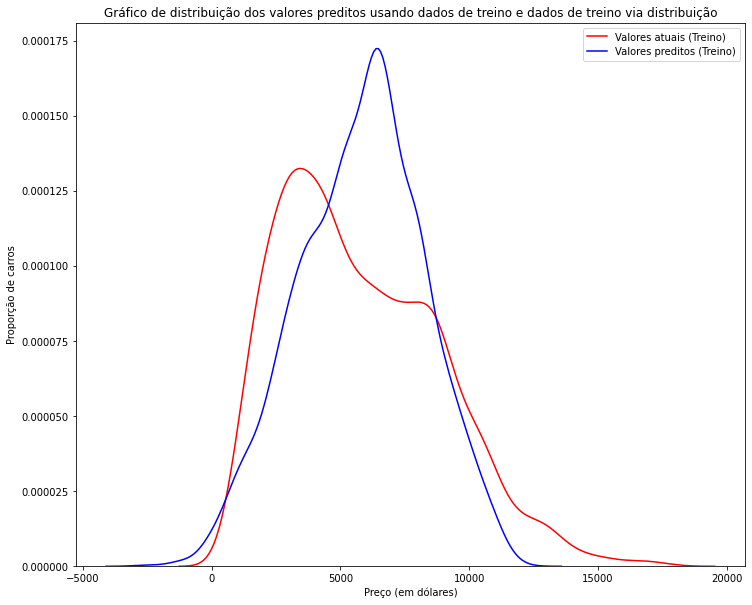

In [226]:
Title = 'Gráfico de distribuição dos valores preditos usando dados de treino e dados de treino via distribuição'
DistributionPlot(y_train, yhat_train, "Valores atuais (Treino)", "Valores preditos (Treino)", Title)

Figura 1: Gráfico dos valores preditos usando dados de treino comparado com os valores atuais dos dados de treino. A linha vermelha indica a distribuição dos valores atuais dos dados de treino; A linha azul indica a distribuição para os valores que foram preditos via treino.

Olhando esse gráfico posso dizer que o Modelo de Machine Mearning criado parece que está indo bem em aprender a partir do dataset de treino.

Mas, o que irá acontecer quando ele encontrar novos dados a partir do dataset de teste?

Quando o Modelo gera novos valores a partir dos dados de teste, podemos ver se a distribuição dos valores preditos diferem muito dos valores alvo atuais.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


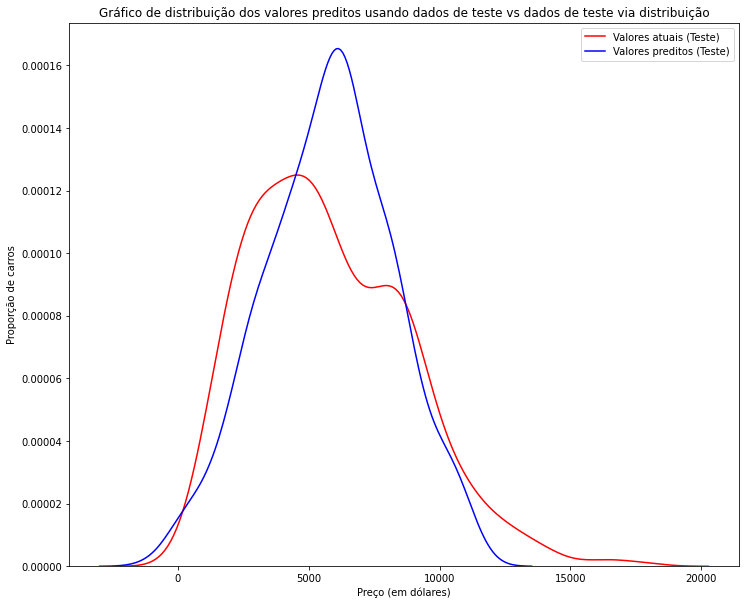

In [52]:
Title='Gráfico de distribuição dos valores preditos usando dados de teste vs dados de teste via distribuição'
DistributionPlot(y_test,yhat_test,"Valores atuais (Teste)","Valores preditos (Teste)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


<h4>Overfitting</h4>
<p>Overfitting ocorre quando o modelo encaixa ao "ruído", mas não ao processo subjacente. Assim, quando testar o nosso modelo usando o dataset de teste o nosso modelo não tem uma performance muito boa, uma vez que está modelando ruído, não o processo subjacente que gera a relação.

Vou criar um modelo polinomial de grau 5.</p>

Vou usar 55 % dos dados para treino o o resto para teste:

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [58]:
from sklearn.preprocessing import PolynomialFeatures

Agora irei desenvolver uma transformação polinomial de grau 5 na variável  <b>'km_rodado'</b>.

In [59]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['km_rodado']])
x_test_pr = pr.fit_transform(x_test[['km_rodado']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

Now, let's create a Linear Regression model "poly" and train it.


In [61]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Nós podemos ver o resultado do nosso modelo usando o método "predict." Nós podemos atribuir os valores a "yhat".

In [63]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([[7395.42884893],
       [7199.36204319],
       [4841.35393368],
       [7495.68776297],
       [7298.67300782]])

Vou comparar os primeiros cinco valores preditos e compará-los aos valores alvo atuais.

In [64]:
print("Valores preditos:", yhat[0:4])
print("Valores alvo:", y_test[0:4].values)

Valores preditos: [[7395.42884893]
 [7199.36204319]
 [4841.35393368]
 [7495.68776297]]
Valores alvo: [[ 8972.60273973]
 [12671.23287671]
 [ 8369.8630137 ]
 [12219.17808219]]


Agora irei usar a função criada "PollyPlot" para mostrar os dados de treino, dados de teste e a função preditora.

In [78]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #Dados de treino 
    #Dados de teste 
    # lr:  objeto da regressão linear 
    #poly_transform:  objeto da transformação polinomial 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Dados de Treino')
    plt.plot(xtest, y_test, 'go', label='Dados de teste')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Função preditiva')
    plt.ylim([-10000, 60000])
    plt.ylabel('Preço (em dólares)')
    plt.xlabel('Kilometragem do veículo')
    plt.legend()

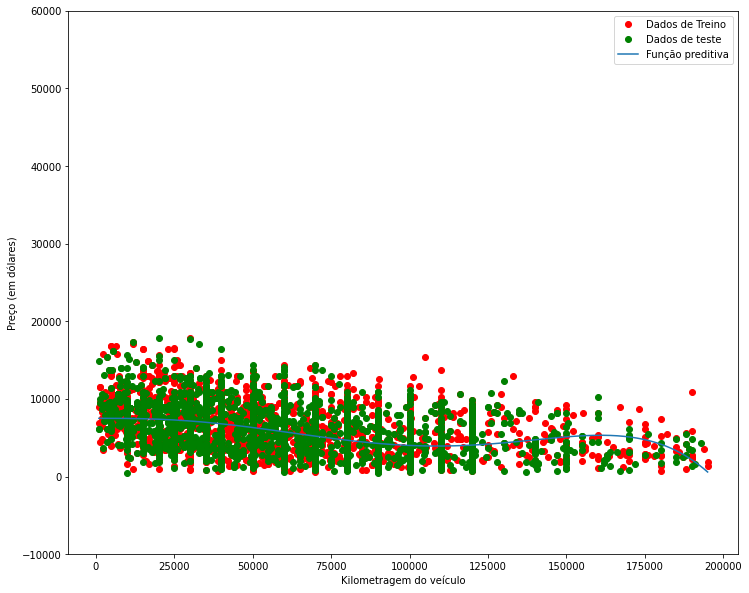

In [79]:
PollyPlot(x_train[['km_rodado']], x_test[['km_rodado']], y_train, y_test, poly,pr)

Figura 3: Modelo de Regressão Polinomial para preço de veículos por kilómetros rodados. Os pontos em vermelho representam dados de treino; pontos em verde representam dados de teste; a linha azul representa o modelo preditivo.

Podemos ver que por volta de 175000 de kilometragem os valores de preço dos carros caem substancialmente.

R^2 dos dados de treino:

In [80]:
poly.score(x_train_pr, y_train)

0.17625613877289784

R^2 dos dados de teste:

In [81]:
poly.score(x_test_pr, y_test)

0.17021208898025098

Podemos ver que os valores de R^2 para os dados de treino e de teste são relativamente similares.

Vou checar como os valores de R^2 mudam nos dados de testee então plotar os resultados:

Text(0.5, 1.0, 'R^2 usando Dados de Teste')

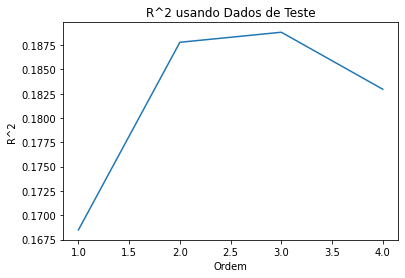

In [84]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['km_rodado']])
    
    x_test_pr = pr.fit_transform(x_test[['km_rodado']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('Ordem')
plt.ylabel('R^2')
plt.title('R^2 usando Dados de Teste')

Pude notar através desse gráfico que o valor de R^2 aumenta até a ordem polinomial de número 3. Após esse valor o valor de R^2 diminui consideravelmente.

Para a próxima etapa irei utilizar a função a seguir:

In [85]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['km_rodado']])
    x_test_pr = pr.fit_transform(x_test[['km_rodado']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['km_rodado']], x_test[['km_rodado']], y_train,y_test, poly, pr)

A interface a seguir possibilita experimentar diferentes ordens de polinomios e diferentes quantidades de dados.


In [88]:
from ipywidgets import interact, interactive, fixed, interact_manual

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

# Conclusão:

- A partir dos dados gerados anteriormente posso concluir que o melhor Modelo de Machine Learning para a relação de preço de veículo por kilometragem é o modelo que tem como ordem polinomial de número 3, uma vez que tem o maior valor de R^2. 

# <h2 id="ref3">Part 3: Ridge Regression</h2> 

O parâmetro alfa é um importante parâmetro que ajuda a melhor o desenvolvimento do modelo.

Assim, aqui irei fazer uma "Ridge Regression" e ver como o parâmetro alfa muda o modelo.

Observação: irei usar os dados de teste como dados de validação.

Vou desenvolver uma transformação polinomial de grau 2 no dataset.

In [89]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['km_rodado', 'consumo_do_combustivel_kmpl', 'motor_CC', 'potencia_do_motor_bhp']])
x_test_pr=pr.fit_transform(x_test[['km_rodado', 'consumo_do_combustivel_kmpl', 'motor_CC', 'potencia_do_motor_bhp']])

Vou importar  <b>Ridge</b>  do módulo <b>linear models</b>.

In [90]:
from sklearn.linear_model import Ridge

Agora irei criar um objseto da Ridge regression e irei ajustar o parâmetro de regularização, que é o alfa to 0.1

In [91]:
RigeModel=Ridge(alpha=1)

Assim como a regressão comum, podemos ajustar o modelo utilizando o método "<b>fit</b>".

In [92]:
RigeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.85211e-24): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

De uma forma similar, eu posso também fazer predições:


In [93]:
yhat = RigeModel.predict(x_test_pr)

Vou comparar as primeiros cinco amostras preditas aos dados de teste:


In [94]:
print('Preditos:', yhat[0:4])
print('Dados de Teste :', y_test[0:4].values)

Preditos: [[ 7068.32614058]
 [11221.83181047]
 [ 6821.53919191]
 [10766.96002116]]
Dados de Teste : [[ 8972.60273973]
 [12671.23287671]
 [ 8369.8630137 ]
 [12219.17808219]]


Aqui irei selecionar o alfa que minimiza o erro de teste. E para fazer tal ação, irei utilizar um loop. Aqui irá ter também uma barra de progresso que mostrará quantas interações foram completadas até o momento.

In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Score de Teste": test_score, "Score de Treino": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

Agora irei plotar o valor de R^2 para cada um desses diferentes alfas:

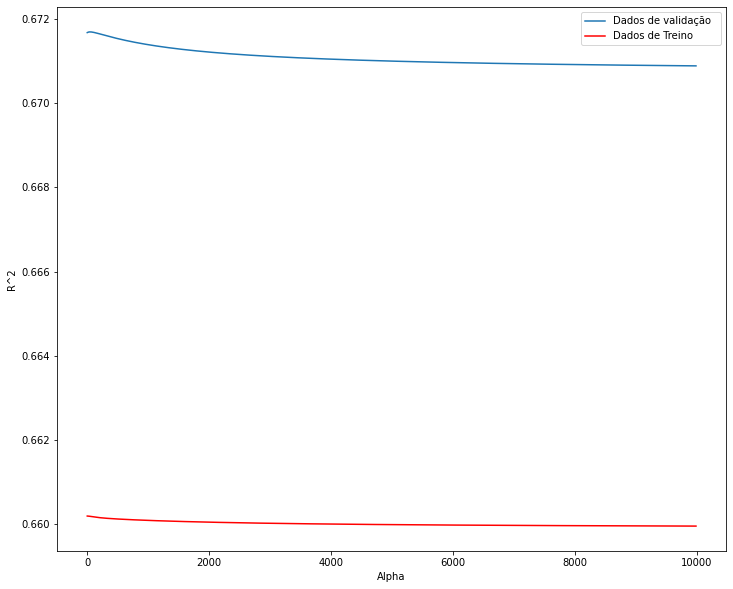

In [96]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='Dados de validação  ')
plt.plot(Alpha,Rsqu_train, 'r', label='Dados de Treino ')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

# Conclusão:

- Tanto para os Dados de Validação como para os Dados de Treino é possível perceber que a medida que o alfa aumenta, os respectivos valores de R^2 diminuem. A medida que o alfa aumenta piora a performance do modelo (possível ver através para os Dados de R^2 dos dados de Treino.

<h2 id="ref4">Part 4: Grid Search</h2>

O termo alfa é um "hyperparameter". Sklearn possui a classe "<b>GridSearchCV</b>" para fazer o processo de encontrar o melhor simplificador de hyperparameter.

Vou importar <b>GridSearchCV</b> a partir do módulo <b>model_selection</b>.

In [97]:
from sklearn.model_selection import GridSearchCV

Vou criar um dicionário de valores de parâmetros:

In [98]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Agora vou criar um objeto da "Ridge regression":

In [99]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Vou criar também um objeto do buscador de "ridge grid":


Para evitar a depreciação de avisos devido a iid parâmetros, vou ajustar os valores de iid para "None".

Ajustando o modelo:

In [100]:
Grid1 = GridSearchCV(RR, parameters1,cv=4, iid=None)

In [112]:


Grid1.fit(x_data[['km_rodado', 'consumo_do_combustivel_kmpl', 'motor_CC', 'potencia_do_motor_bhp']], y_data)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid=None, n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

O objeto encontra os melhores valores de parâmetros nos dados de validação. Nós podemos obter o estimador com os melhores parâmetros e cria-lo para a variável como descrito a seguir:

In [113]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Agora irei testar o nosso modelo nos dados de teste:

In [114]:
BestRR.score(x_test[['km_rodado', 'consumo_do_combustivel_kmpl', 'motor_CC', 'potencia_do_motor_bhp']], y_test)

0.609617835671997

### Essa etapa finaliza o Projeto 01

## Autor:

Lucas Andrei Campos-Silva

- link para meu portifólio de projetos em Data Science: https://github.com/Campos-Silva
- e-mail para contato: andrei.10@hotmail.com
- linkedIn: https://www.linkedin.com/in/lucas-andrei-campos-silva/